<a href="https://colab.research.google.com/github/ncchaudhari10/study_on_mnist/blob/main/sml_mp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
import time

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.datasets import fetch_openml


In [4]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784")
X = np.array(mnist.data.astype('float32'))
y = np.array(mnist.target.astype('int'))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
#EXPLORATORY DATA ANALYSIS

# Convert to DataFrame
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['label'] = mnist.target.astype(int)

In [6]:

# Display basic information about the dataset
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to label
dtypes: float64(784), int64(1)
memory usage: 419.2 MB


In [7]:

# Display summary statistics
mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


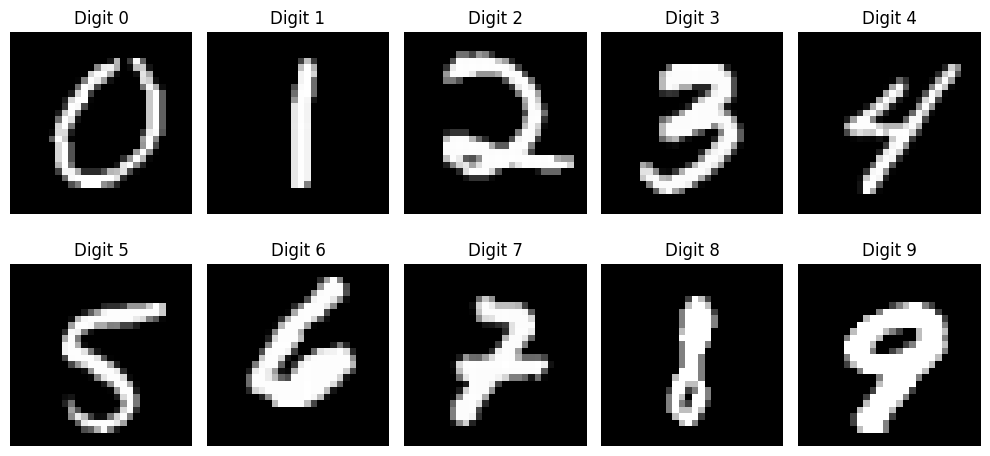

In [8]:
# Display a random sample of digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit = mnist_df[mnist_df['label'] == i].sample(1)
    digit_pixels = digit.drop('label', axis=1).values.reshape(28, 28)
    plt.imshow(digit_pixels, cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# #DATA PREPROCESSING
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [29]:

# # normalize the data to be between 0 and 1
# x_train = x_train / 255.0
# x_test = x_test / 255.0

num_classes = len(set(y_train))
num_classes

10

**RANDOM FOREST CLASSIFIER** bold text

In [9]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional metrics
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.9672857142857143
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [10]:
#EVALUATION
y_pred = rf_model.predict(X_test)
es = metrics.accuracy_score(y_test, y_pred)


# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_test))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.9643389990975768, 0.9702324294738518)


In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [14]:

print("Number of predictions:", len(y_pred))
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))



Number of predictions: 14000
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_pred: [0 1 2 3 4 5 6 7 8 9]


In [15]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)


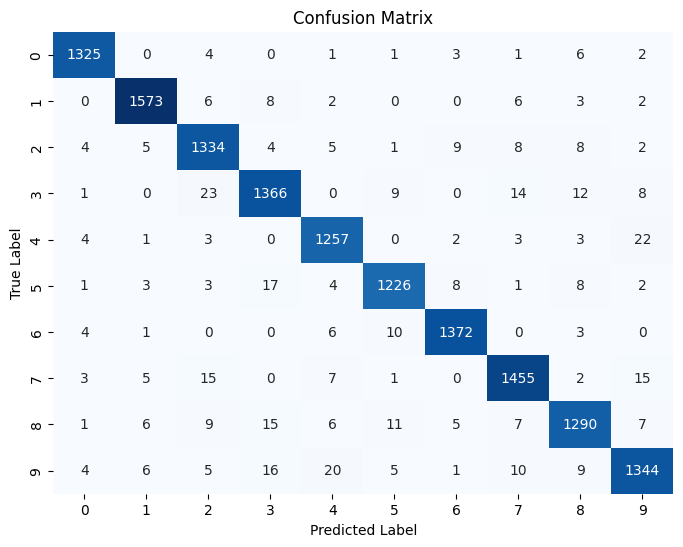

In [16]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# RandomForestClassifier PARAMETERS ESTIMATION
# rf_params = 100  # n_estimators

# OneVsRestClassifier parameters
num_classes = len(np.unique(y_train))  # Number of classes
total_rf_params = rf_model.estimator.get_params(deep=True)  # Get parameters of RandomForestClassifier
total_params_one_vs_rest = num_classes * len(total_rf_params)

print(f"Total parameters in OneVsRestClassifier with RandomForestClassifier: {total_params_one_vs_rest}")

Total parameters in OneVsRestClassifier with RandomForestClassifier: 120


In [17]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms


# Load the image
image_path = '/content/Picture3.png'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

img_array=image_array.reshape(1,784)
# Normalize and standardize the image array (adjust these transforms based on your model)

result=rf_model.predict(img_array)
result

array([5])

In [18]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms


# Load the image
image_path = '/content/Picture1.png'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

img_array=image_array.reshape(1,784)
# Normalize and standardize the image array (adjust these transforms based on your model)

result=rf_model.predict(img_array)
result

array([1])

In [19]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms


# Load the image
image_path = '/content/img1.jpg'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

img_array=image_array.reshape(1,784)
# Normalize and standardize the image array (adjust these transforms based on your model)

result=rf_model.predict(img_array)
result

array([2])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml("mnist_784")
X = np.array(mnist.data.astype('float32'))
y = np.array(mnist.target.astype('int'))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional metrics
print(metrics.classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.9178571428571428
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.91      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.89      0.85      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.87      0.87      0.87      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lr_model.predict(X_test)
es = metrics.accuracy_score(y_test, y_pred)


# Calculate the margin of error
margin_of_error = 1.96 * np.sqrt(es * (1 - es) / len(y_test))

# Calculate the confidence interval
confidence_interval = (es - margin_of_error, es + margin_of_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (0.9133086815788642, 0.9224056041354214)


In [ ]:
# Number of features
num_features = X_train.shape[1]

# Number of classes
num_classes = len(np.unique(y_train))

# Total number of parameters for Logistic Regression
total_parameters = (num_features + 1) * num_classes

print(f"Total number of parameters in Logistic Regression: {total_parameters}")


Total number of parameters in Logistic Regression: 7850


In [ ]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms


# Load the image
image_path = '/content/img7.jpg'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

img_array=image_array.reshape(1,784)
# Normalize and standardize the image array (adjust these transforms based on your model)

result=lr_model.predict(img_array)
result

array([7])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Apply PCA
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

# Train Naive Bayes on the reduced dimensionality data
nb_model = GaussianNB()
fit_nb = nb_model.fit(x_train_pca, y_train)

# Predict on the test set
prediction = fit_nb.predict(x_test_pca)

# Evaluate the model
con_matrix = confusion_matrix(y_test, prediction)
accuracy = np.sum(np.diag(con_matrix)) / np.sum(con_matrix)
print(f'Accuracy: {accuracy * 100:.2f}%')

11490434/11490434 [==============================] - 1s 0us/step
Accuracy: 72.16%


In [ ]:
# Number of original features
num_original_features = x_train.shape[1]

# Number of PCA components
num_pca_components = n_components  # Adjusted based on your PCA setting

# Number of classes
num_classes = len(np.unique(y_train))

# Number of parameters for Gaussian Naive Bayes (mean and standard deviation for each feature and each class)
num_parameters_per_class = 2 * (num_original_features + num_pca_components)

# Total number of parameters
total_parameters = num_parameters_per_class * num_classes

print(f"Total number of parameters in Gaussian Naive Bayes with PCA: {total_parameters}")


Total number of parameters in Gaussian Naive Bayes with PCA: 16680


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Standardize the data
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Apply PCA
n_components = 50
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

# Train Naive Bayes on the reduced dimensionality data
nb_model = GaussianNB()
fit_nb = nb_model.fit(x_train_pca, y_train)

# Predict on the test set
prediction = fit_nb.predict(x_test_pca)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, prediction)

# Calculate the standard error of the proportion (accuracy)
se = np.sqrt(accuracy * (1 - accuracy) / len(y_test))

# Calculate the margin of error
margin_of_error = 1.96 * se  # Using the critical value 1.96 for a 95% confidence interval

# Calculate the confidence interval
confidence_interval = (accuracy - margin_of_error, accuracy + margin_of_error)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'95% Confidence Interval: {confidence_interval}')


Accuracy: 72.20%
95% Confidence Interval: (0.7132189375039235, 0.7307810624960764)


In [ ]:
from PIL import Image
import numpy as np
import torch
from torchvision import transforms


# Load the image
image_path = '/content/Picture3.png'
image = Image.open(image_path)

# Convert the image to grayscale
gray_image = image.convert('L')

# Convert the grayscale image to a NumPy array
image_array = np.array(gray_image)

img_array=image_array.reshape(1,784)
# Normalize and standardize the image array (adjust these transforms based on your model)


img_array = scaler.transform(img_array)

img_array = pca.transform(img_array)
result=nb_model.predict(img_array)

result

array([6], dtype=uint8)